In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

## 1. Reading data

In [103]:
data = pd.read_csv("mushroom.csv")
X, y = data.drop('class', axis=1).copy(), data['class'].copy()
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [104]:
#по умолчанию describe делается по числовым колонкам
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [105]:
#describe по не числовым колонкам
data.describe(exclude=[np.number])

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069,61069,46949,61069,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069
unique,2,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4
top,p,x,t,n,f,a,c,w,s,s,w,u,w,f,f,k,d,a
freq,33888,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177


In [106]:
NaN_percent = X.isnull().sum(axis=0) / len(X) * 100 # % NaN
print(NaN_percent)
#баланс классов
print('-'*20)
print(y.describe())
print({k:(y == k).mean() for k in y.unique()})

cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64
--------------------
count     61069
unique        2
top           p
freq      33888
Name: class, dtype: object
{'p': 0.5549132947976878, 'e': 0.44508670520231214}


* Существует проблема, что есть признаки, у которых  большое количество пропусков, поэтому для некоторых моделей это может стать проблемой

  Так как я не разбираюсь в грибах принимаю решение избавиться от тех признаков, что содержат много пропусков, а там где пропусков мало заполним модой

* Классы выглядят сбалансированными

In [295]:
data = data.drop(columns=NaN_percent[NaN_percent > 20].index) #удалим столбцы, в которых >20% значений пропущено

KeyError: "['cap-surface', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'] not found in axis"

In [296]:
data.fillna()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,o,f,e,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,y,f,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,y,f,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,y,f,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,y,f,f,f,3.56,5.44,y,f,f,d,u


In [107]:
#y transformation
LE = LabelEncoder().fit(y)
y = LE.transform(y)

In [108]:
#x transformation
categorical_columns = X.select_dtypes(exclude = [np.number]).columns.to_list()

for col in categorical_columns:
    oh = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
    one_hot_encoded = oh.fit_transform(X[[col]])
    X = pd.concat([X,one_hot_encoded],axis=1).drop(columns=[col])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 2. Training models

In [110]:
models_dict = {}

#### 2.1 OneRule

In [111]:
from mlxtend.classifier import OneRClassifier

In [112]:
OneR = OneRClassifier().fit(X_train.to_numpy(), y_train)
y_pred = OneR.predict(X_test.to_numpy())
print(f'Accuracy: {(y_pred == y_test).mean()}')

Accuracy: 0.6013863872059385


In [113]:
models_dict['OneR'] = OneR

#### 2.2 LogisticRegression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
LogReg = LogisticRegression(max_iter=2000).fit(X_train, y_train)
print(
f'''Accuracy: {LogReg.score(X_test, y_test)}
roc_auc score {roc_auc_score(y_test, LogReg.predict_proba(X_test)[:, 1])}'''
)#Разберись что пихают в рок аук

Accuracy: 0.8613066972326838
roc_auc score 0.9357636421807044


In [116]:
models_dict['LogReg'] = LogReg

#### 2.3 KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
KNN = KNeighborsClassifier().fit(X_train, y_train)
print(
f'''Accuracy: {KNN.score(X_test, y_test)}
roc_auc score {roc_auc_score(y_test, KNN.predict_proba(X_test)[:, 1])}'''
)

Accuracy: 0.9995633426123028
roc_auc score 0.9999384352994417


In [119]:
models_dict['KNN'] = KNN

#### 2.4 Bayes Classifier

In [120]:
from sklearn.naive_bayes import CategoricalNB

In [121]:
MrBayes = CategoricalNB().fit(X_train, y_train)
print(
f'''Accuracy: {MrBayes.score(X_test, y_test)}
roc_auc score {roc_auc_score(y_test, MrBayes.predict_proba(X_test)[:, 1])}'''
)
#что-то с фичами не так, нужен фикс

Accuracy: 0.7872932700180121
roc_auc score 0.8804257162275968


In [122]:
models_dict['Bayes'] = MrBayes

#### 2.5 DescisionTree

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
print(
f'''train acc {(tree.predict(X_train) == y_train).mean()}
test acc {(tree.predict(X_test) == y_test).mean()}
'''
)

train acc 1.0
test acc 0.9991812673980678



In [125]:
models_dict['tree'] = tree

#### 2.6 Boosting

In [154]:
from catboost import CatBoostClassifier, Pool

In [157]:
test_pool = Pool(X_test, y_test)

Boosting = CatBoostClassifier(iterations=256,
                           depth=3,
                           learning_rate=0.001,
                           loss_function='Logloss',
                           task_type='GPU',
                           verbose=False)
# train the model
Boosting.fit(X_train, y_train)
# make the prediction using the resulting model
preds_class = model.predict(test_pool)
preds_proba = model.predict_proba(test_pool)
score = model.score(test_pool)
print("class = ", preds_class)
print("proba = ", preds_proba)
print("score = ", score)

class =  [0 1 0 ... 0 0 1]
proba =  [[0.57208783 0.42791217]
 [0.46681048 0.53318952]
 [0.50599494 0.49400506]
 ...
 [0.50593279 0.49406721]
 [0.50599494 0.49400506]
 [0.41506982 0.58493018]]
score =  0.7109873915179302


In [158]:
models_dict['CatBoost'] = Boosting

#### 2.7 SVC

In [129]:
from sklearn.svm import SVC

In [131]:
vector_classif = SVC().fit(X_train, y_train)
print(
f'''Accuracy: {vector_classi.score(X_test, y_test)}'''
)

Accuracy: 0.9574259046995252


In [132]:
models_dict['SVM'] = vector_classif

#### 2.8 MLP

In [133]:
from sklearn.neural_network import MLPClassifier

In [134]:
MLP = MLPClassifier().fit(X_train, y_train)
print(
f'''Accuracy: {MLP.score(X_test, y_test)}
roc_auc score {roc_auc_score(y_test, MLP.predict_proba(X_test)[:, 1])}'''
)

Accuracy: 1.0
roc_auc score 1.0


In [135]:
models_dict['MLP'] = MLP

#### 2.9 Ensemble

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
forest = RandomForestClassifier(n_estimators=50, 
                                criterion='entropy', 
                                max_depth=30)
forest.fit(X_train, y_train)
print(
f'''train acc {(forest.predict(X_train) == y_train).mean()}
test acc {(forest.predict(X_test) == y_test).mean()}'''
)

train acc 1.0
test acc 1.0


In [139]:
models_dict['RandomForest'] = forest 

## 3. Testing models

#### 3.1 Metrics

In [266]:
#accuracy
accuracy_list = list() #для df
print(f'{'Model name':13}|{'accuracy':>10}')
print('-'*25)
for name, model in models_dict.items():
    score = (model.predict(X_test.to_numpy()) == y_test).mean() if name == 'OneR' else (model.predict(X_test) == y_test).mean()
    accuracy_list.append(score)
    print(f'{name:13}|{score:>10.2f}')

Model name   |  accuracy
-------------------------
OneR         |      0.60
LogReg       |      0.86
KNN          |      1.00
Bayes        |      0.79
tree         |      1.00
CatBoost     |      0.71
SVM          |      0.96
MLP          |      1.00
RandomForest |      1.00


In [267]:
#f1-score
f1_list = list() #для df
print(f'{'Model name':13}|{'f1-score':>10}')
print('-'*25)
for name, model in models_dict.items():
    y_pred = model.predict(X_test.to_numpy()) if name == 'OneR' else model.predict(X_test)
    score = f1_score(y_test, y_pred)
    f1_list.append(score)
    print(f'{name:13}|{score:>10.2f}')

Model name   |  f1-score
-------------------------
OneR         |      0.65
LogReg       |      0.87
KNN          |      1.00
Bayes        |      0.80
tree         |      1.00
CatBoost     |      0.72
SVM          |      0.96
MLP          |      1.00
RandomForest |      1.00


In [269]:
#roc_auc_score
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
roc_auc_list = list() # для df
print(f'{'Model name':13}|{'f1-score':>10}')
print('-'*25)
for name, model in models_dict.items():
    if name == 'OneR':
        y_pred = model.predict(X_test.to_numpy())
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        roc_auc_list.append(roc_auc)
        print(f'{name:13}|{roc_auc:>10.2f}')
        continue

    y_score = model.decision_function(X_test) if name == 'SVM' else model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_score)
    roc_auc_list.append(score)
    print(f'{name:13}|{score:>10.2f}')

Model name   |  f1-score
-------------------------
OneR         |      0.59
LogReg       |      0.94
KNN          |      1.00
Bayes        |      0.88
tree         |      1.00
CatBoost     |      0.80
SVM          |      0.99
MLP          |      1.00
RandomForest |      1.00


In [272]:
models_dict.keys()

dict_keys(['OneR', 'LogReg', 'KNN', 'Bayes', 'tree', 'CatBoost', 'SVM', 'MLP', 'RandomForest'])

In [276]:
#beautiful table
score_table = pd.DataFrame(np.array([accuracy_list, f1_list, roc_auc_list]).T, index=models_dict.keys(), columns=['Accuracy', 'F1_Score', 'ROC AUC'])
score_table

,Accuracy,F1_Score,ROC AUC
OneR,0.601386,0.648844,0.593723
LogReg,0.861307,0.873752,0.935764
KNN,0.999563,0.999606,0.999938
Bayes,0.787293,0.801102,0.880426
tree,0.999181,0.999260,0.999225
CatBoost,0.710987,0.719856,0.800687
SVM,0.957426,0.961843,0.989694
MLP,1.000000,1.000000,1.000000
RandomForest,1.000000,1.000000,1.000000


#### 3.2 Plots

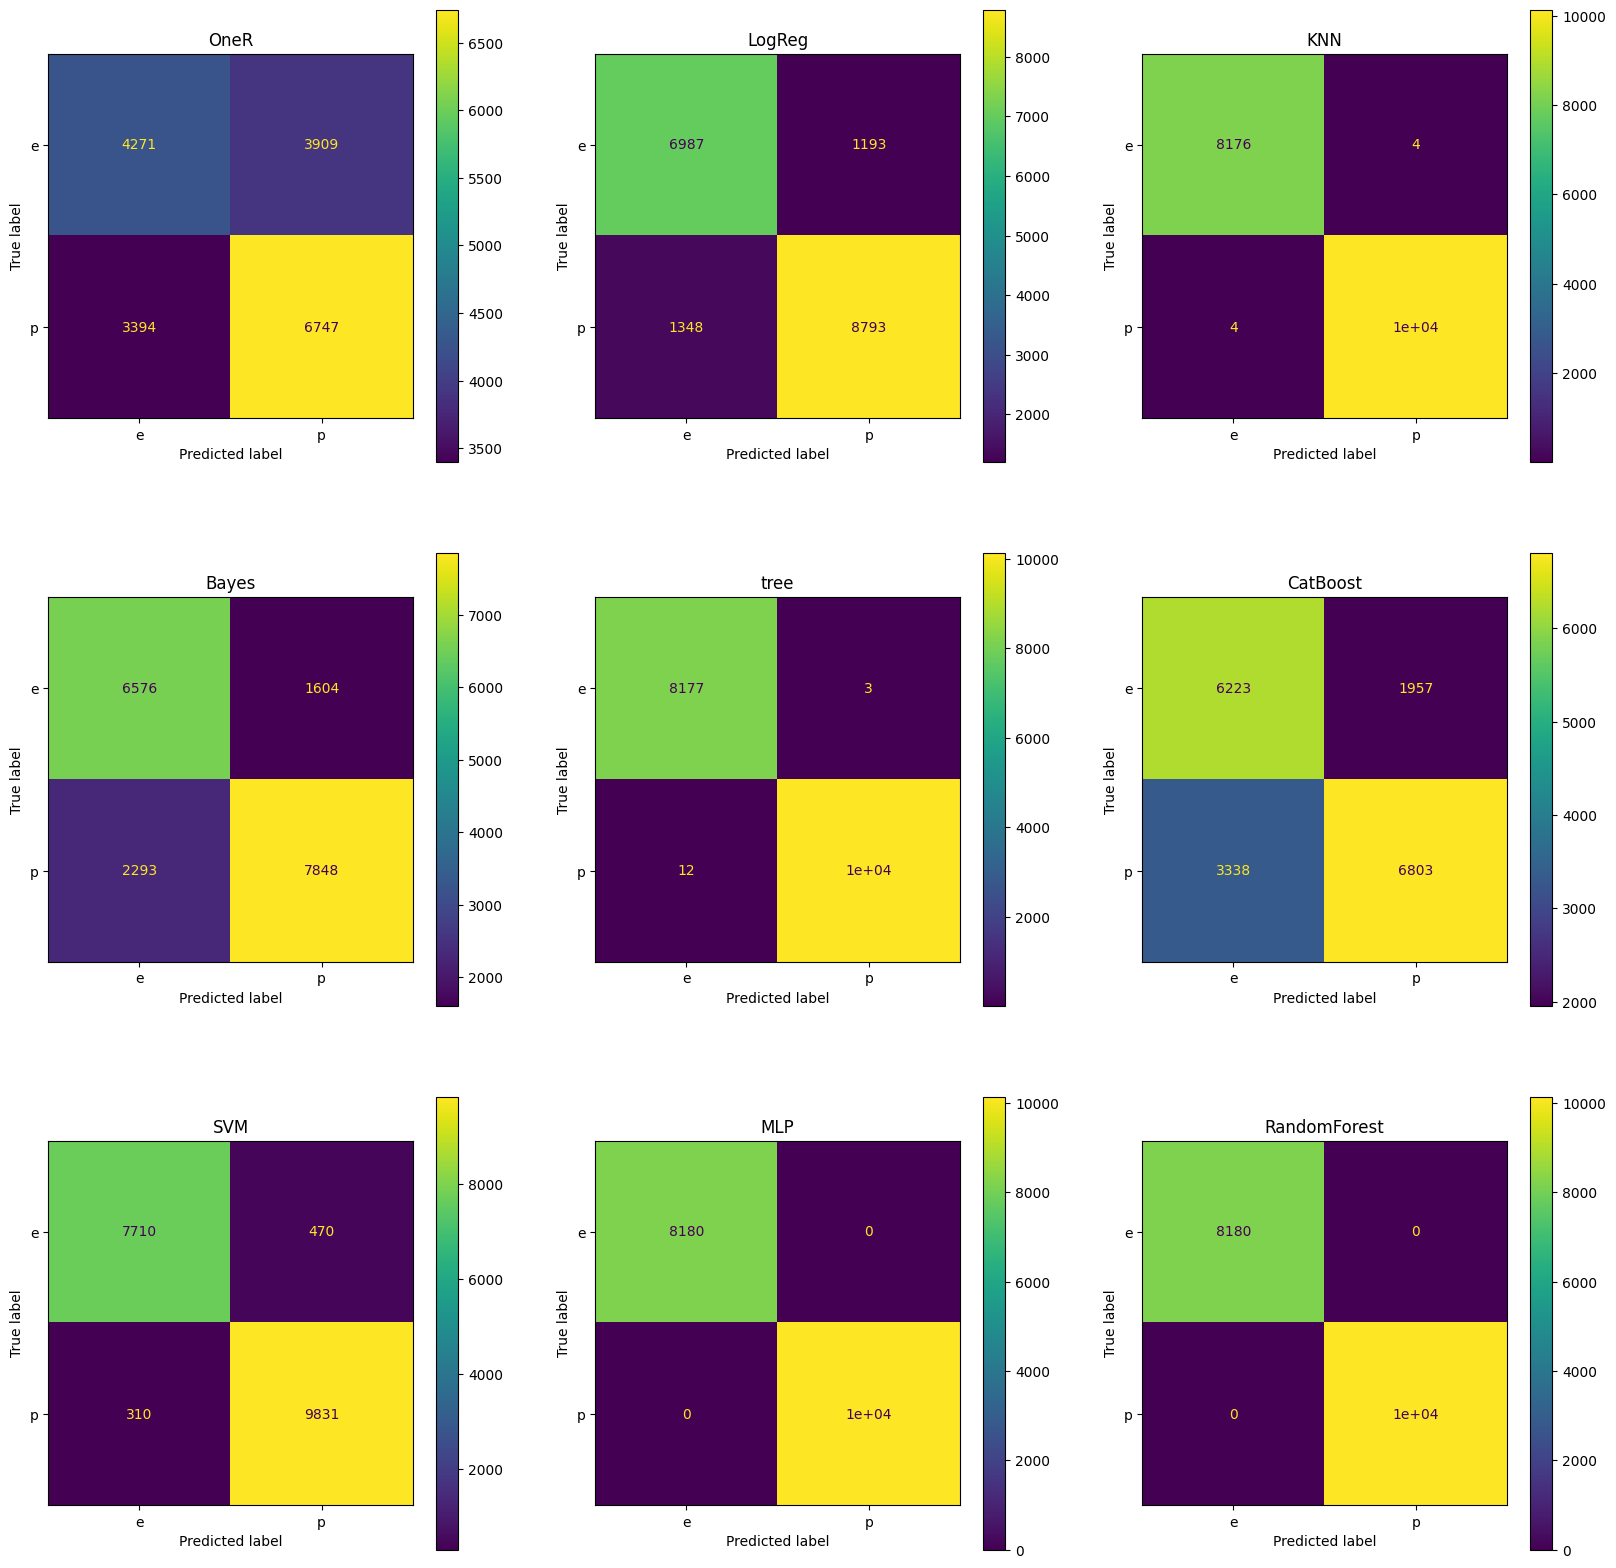

In [243]:
#confusion matrix
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
counter = 0
for i in range(3):
    for j in range(3):
        name, model = list(models_dict.items())[counter]
        y_pred = model.predict(X_test.to_numpy()) if name == 'OneR' else model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        ax[i][j].set_title(name)
        ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LE.classes_).plot(ax=ax[i][j])
        counter+=1

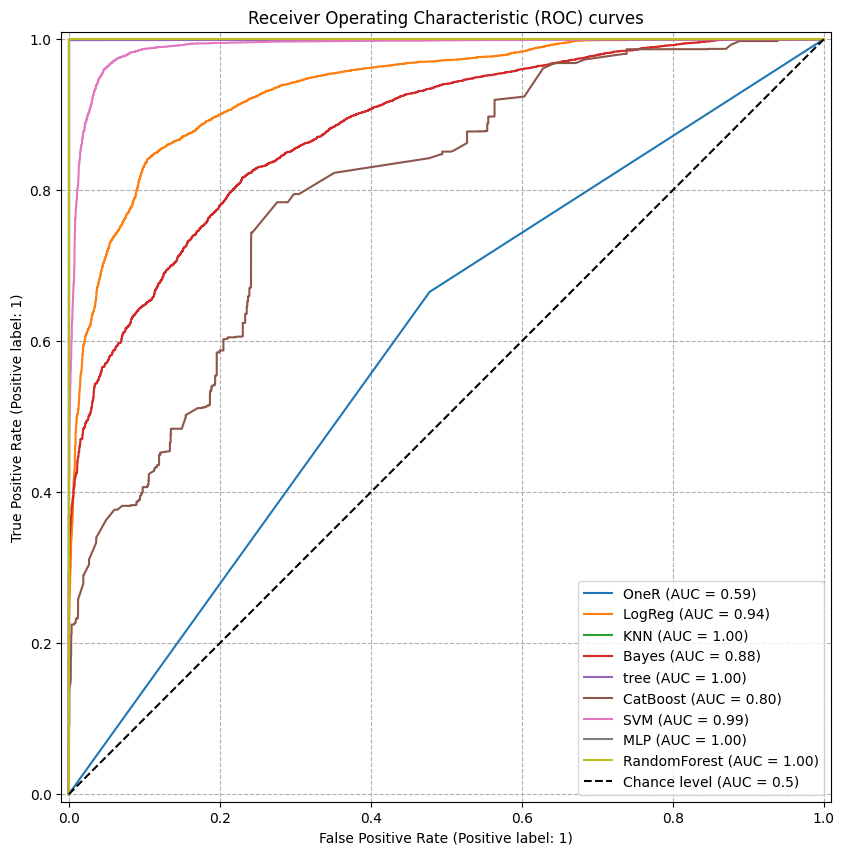

In [265]:
#roc auc curve
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for name, model in models_dict.items():
    if name == 'OneR':
        y_pred = model.predict(X_test.to_numpy())
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot(ax=ax) if name == 'OneR' else RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name=name)
ax.plot((0, 1), (0, 1), 
        label="Chance level (AUC = 0.5)",
        color="k",
        linestyle="--",)
ax.legend()
ax.set_title("Receiver Operating Characteristic (ROC) curves")
ax.grid(linestyle="--")